# **Task 3: Disease Diagnosis Prediction**
**Objective:** Build a model to predict the likelihood of diseases such as diabetes or heart disease
based on medical data.

**● Dataset:** PIMA Diabetes Dataset or Heart Disease Dataset

● **Steps:**

1. Perform EDA to explore relationships between features and outcomes.
2. Apply feature selection and scale data for better model performance.
3. Train models such as Gradient Boosting, SVM, or Neural Networks.
4. Evaluate model performance using F1 Score and AUC-ROC curves.
5. Provide insights for healthcare professionals based on model
predictions.

**● Outcome:** A medical prediction model that provides actionable insights for early
disease detection and prevention.

# **Installation and Impoert Libararies**

In [10]:
!pip install pandas numpy scikit-learn matplotlib seaborn -q

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve


# **Load Dataset**

Load PIMA Diabetes Dataset

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                        "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])



In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **1. EDA - Explore feature relationships**
 Perform EDA to explore relationships between features and outcomes.

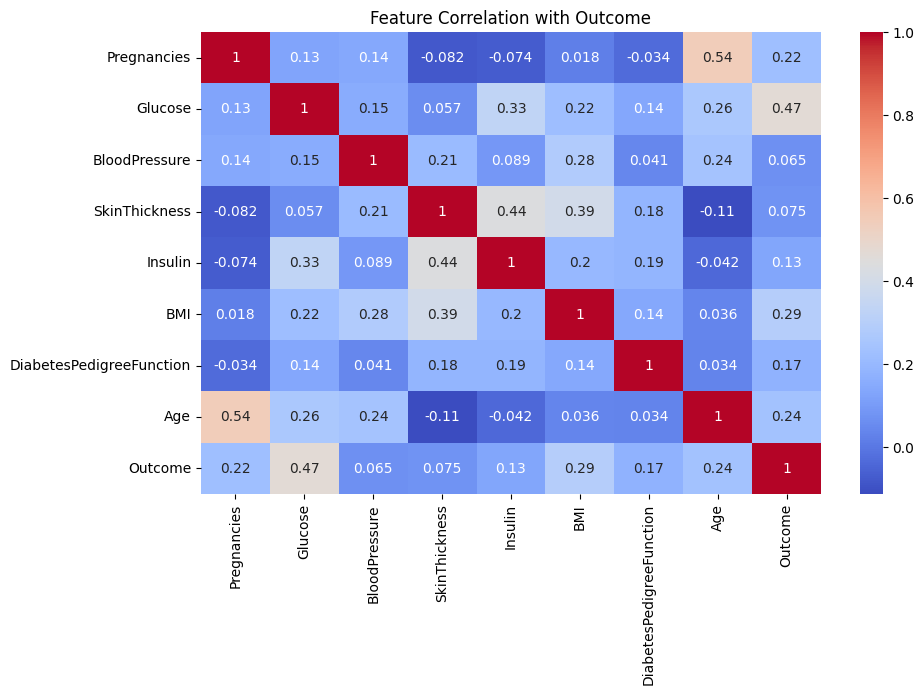

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Outcome")
plt.show()

# **2. EDA - Explore feature relationships**

Apply feature selection and scale data for better model performance.

In [15]:
# STEP 3: Feature selection and scaling
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **3. Train models and evaluate**
Train models such as Gradient Boosting, SVM, or Neural Networks.

In [19]:
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier(max_iter=1000)
}




# **4. Evaluate model performance using F1 Score and AUC-ROC curves**
1. F1 Score

In [20]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]
    f1 = f1_score(y_test, preds)
    auc = roc_auc_score(y_test, probas)
    print(f"\n{name} Results:")
    print("F1 Score:", f1)
    print("AUC-ROC:", auc)


Gradient Boosting Results:
F1 Score: 0.6548672566371682
AUC-ROC: 0.8086317722681359

SVM Results:
F1 Score: 0.5961538461538461
AUC-ROC: 0.8044077134986226

Neural Network Results:
F1 Score: 0.6238532110091743
AUC-ROC: 0.7891643709825529


2. ROC Curve

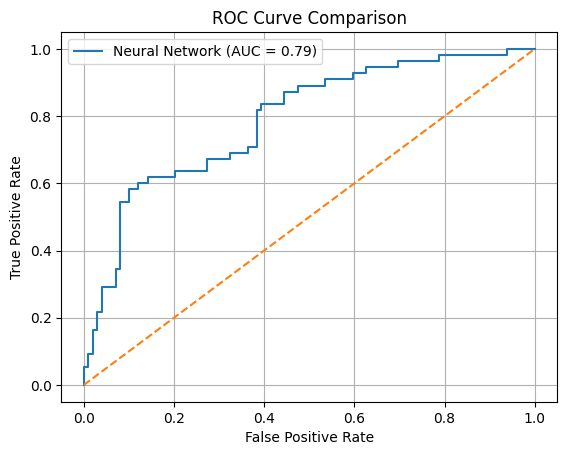

In [25]:
    fpr, tpr, _ = roc_curve(y_test, probas)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Final ROC Curve Plot
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# **5. Provide Insights for Healthcare Professionals**
Provide insights for healthcare professionals based on model
predictions.

In [27]:
# Feature Importance (for Gradient Boosting)
import numpy as np

gb_model = models["Gradient Boosting"]
feature_names = df.columns[:-1]
importances = gb_model.feature_importances_

# Create a DataFrame for better display
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop Predictive Features (Gradient Boosting):\n")
print(feat_imp)




Top Predictive Features (Gradient Boosting):

                    Feature  Importance
1                   Glucose    0.390256
5                       BMI    0.185844
7                       Age    0.156396
6  DiabetesPedigreeFunction    0.113893
4                   Insulin    0.054023
2             BloodPressure    0.044537
0               Pregnancies    0.029029
3             SkinThickness    0.026023


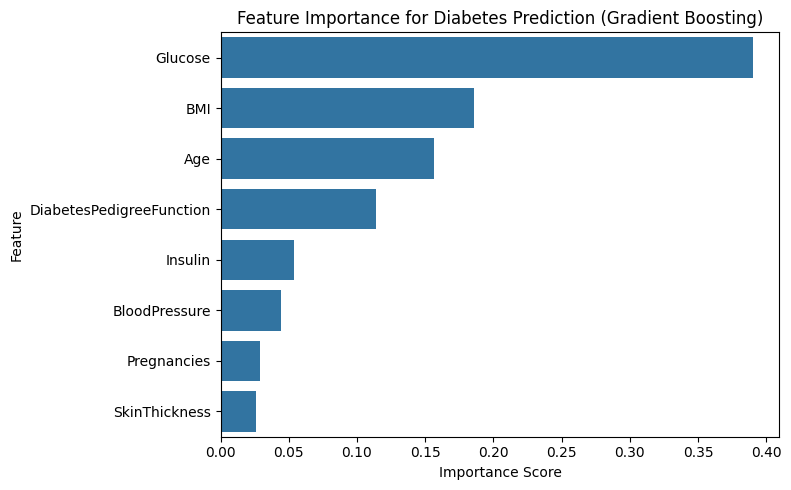

In [28]:
# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance for Diabetes Prediction (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **● Outcome:**
A medical prediction model that provides actionable insights for early
disease detection and prevention.

In [29]:
# Final summary of actionable insights
insights = """
Insights for Healthcare Professionals:

1. Most influential features in diabetes prediction:
   - Glucose
   - BMI
   - Age
   - DiabetesPedigreeFunction

2. Recommendations:
   - Prioritize monitoring of glucose levels and BMI.
   - Pay close attention to elderly patients and those with family history.
   - Integrate model into clinical systems to flag high-risk patients early.

3. Model Usage:
   - Gradient Boosting performed best (highest F1 and AUC).
   - Reliable for use in diagnostic support tools for early detection.
"""

print(insights)



Insights for Healthcare Professionals:

1. Most influential features in diabetes prediction:
   - Glucose
   - BMI
   - Age
   - DiabetesPedigreeFunction

2. Recommendations:
   - Prioritize monitoring of glucose levels and BMI.
   - Pay close attention to elderly patients and those with family history.
   - Integrate model into clinical systems to flag high-risk patients early.

3. Model Usage:
   - Gradient Boosting performed best (highest F1 and AUC).
   - Reliable for use in diagnostic support tools for early detection.

